In [1]:
import os.path
from typing import List, Tuple

import cv2
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn.metrics as M

In [2]:
DATA_ROOT = "/home/jovyan/work/data"

CODE_ROOT = os.path.join(DATA_ROOT, "code")
YALE_ROOT = os.path.join(DATA_ROOT, "CroppedYale")

TRAIN_LIST_PATH = os.path.join(CODE_ROOT, "learn.txt")
TEST_LIST_PATH = os.path.join(CODE_ROOT, "test.txt")

MODEL_PATH = "output/recognizer.pkl"

In [3]:
def read_data(path: str) -> Tuple[List[np.ndarray], List[int]]:
    def read_images(paths: List[str]) -> List[np.ndarray]:
        images: List[np.ndarray] = [cv2.imread(path, 0) for path in paths]
        return images

    with open(path) as f:
        lines = [line.strip() for line in f.readlines()]
        lines = [line.split(";") for line in lines]
        paths = [line[0].replace("./code", DATA_ROOT) for line in lines]
        images = read_images(paths)
        labels = [int(line[1]) for line in lines]
        return images, labels

In [4]:
x_train, y_train = read_data(TRAIN_LIST_PATH)
x_test, y_test = read_data(TEST_LIST_PATH)

In [5]:
recognizer = cv2.face.EigenFaceRecognizer_create()

In [6]:
# train
recognizer.train(x_train, np.array(y_train))

In [7]:
# test
y_pred: List[int] = []
num_tests = len(y_test)
for i, (image, label) in enumerate(zip(x_test, y_test), start=1):
    pred, _conf = recognizer.predict(image)
    y_pred.append(pred)

In [8]:
def plot_confusion_matrix(y_true: List[int], y_pred: List[int]):
    plt.figure(figsize=(10, 8))
    cm = M.confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True)

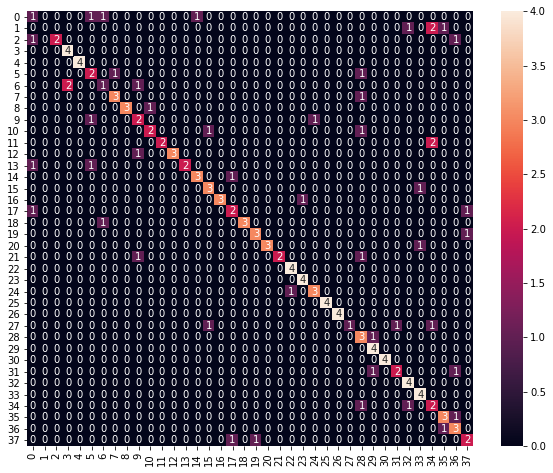

In [9]:
plot_confusion_matrix(y_test, y_pred)

In [10]:
print(M.accuracy_score(y_test, y_pred))

0.6842105263157895
